## HOME CREDIT CLIENT PAYMENT PREDICTION

PT. HOME CREDIT merupakan suatu perusahaan perusahaan pembiayaan multiguna multinasional yang memberikan layanan pembiayaan bagi pelanggan. Terdapat banyak pengajuan credit yang masuk tetapi akan sangat menghabiskan banyak waktu jika harus dilakukan review pengajuan satu per satu secara manual. 

In [98]:
# Import Library
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [99]:
#importing data for modeling
dataset = pd.read_csv('application.csv')
dataset.head(4)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
#Data Understanding
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Terdapat 122 kolom data dengan 48744 record data, dimana setiap record data merupakan data dari seorang customer.

#### Data Cleansing and Preprocessing

Pertama, untuk modeling akan dilakukan feature selection dengan memilih kolom/feature mana saja yang dianggap dapat merepresentasikan profil customer. 
Kami hanya akan menggunakan feature SK_ID_CURR, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, CNT_FAM_MEMBERS sebagai feature yang akan merepresentasikan client, dan fature TARGET sebagai label target yang akan diprediksi.

Dimana client dengan label target 1 dianggap tidak dapat melakukan pembayaran, dan label target 0 dianggap dapat melakukan pembayaran.

In [101]:
# Feature Selection
datamodel = dataset[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'CNT_FAM_MEMBERS']]

In [102]:
# Missing data handle
isna = datamodel.isnull().sum().reset_index()
isna = isna[isna[0] > 0].reset_index()
isna

,level_0,index,0
0,9,AMT_ANNUITY,12
1,10,AMT_GOODS_PRICE,278
2,13,CNT_FAM_MEMBERS,2


Terdapat 3 kolom data yang memiliki missing value. Karena banyak record data yang mengandung missing value tidak banyak dan banyak record dalam dataset dianggap cukup banyak, sehingga akan dihapus record data dengan missing value. Selain itu imputasi data dianggap tidak baik karena ditakutkan akan merusak dataset karena tidak sesuai dengan kenyataan lapangan.

In [103]:
datamodel = datamodel.dropna()
datamodel.isnull().sum().sum()

0

Dataset tidak lagi memiliki missing value.

Pada dataset, terdapat client dengan gender XNA, client ini juga akan dihapus dari dataset karena tidak melengkapi data. 

In [104]:
datamodel = datamodel[datamodel['CODE_GENDER'] != 'XNA']

In [105]:
# Duplicated data handling
datamodel.duplicated().sum()

0

Tidak terdapat data duplikat pada model

In [106]:
# Checking data dimention
print("Data length before cleansing:", dataset.shape[0])

#deleting the missing data train
print("Data length after cleansing:", datamodel.shape[0])

Data length before cleansing: 307511
Data length after cleansing: 307217


In [107]:
# Checking data sample
datamodel.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Single / not married,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Married,2.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Single / not married,1.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Civil marriage,2.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Single / not married,1.0


Selanjutnya akan dilakukan feature encoding, dengan ketentuan :
* NAME_CONTRACT_TYPE akan diganti dengan 0 untuk 'Cash loans', dan 1 untuk 'Revolving loans'
* CODE_GENDER akan diganti dengan 0 untuk 'F', dan 1 untuk 'M'
* FLAG_OWN_CAR akan diganti dengan 0 untuk 'N', dan 1 untuk 'Y'
* FLAG_OWN_REALTY akan diganti dengan 0 untuk 'N', dan 1 untuk 'Y'
* NAME_INCOME_TYPE akan diganti dengan 0 untuk 'Businessman', 'Commercial associate', 'State servant', 'Working', dan 1 untuk 'Maternity leave', 'Pensioner', 'Student','Unemployed'.
* NAME_FAMILY_STATUS akan diganti dengan 0 untuk 'Separated', 'Single / not married', 'Widow', dan 1 untuk 'Civil marriage', 'Married'

In [108]:
# Feature encoding
datamodel['NAME_CONTRACT_TYPE'] = datamodel['NAME_CONTRACT_TYPE'].replace({'Cash loans' : 0, 'Revolving loans' : 1})
datamodel['CODE_GENDER'] = datamodel['CODE_GENDER'].replace({'F' : 0, 'M' : 1})
datamodel['FLAG_OWN_CAR'] = datamodel['FLAG_OWN_CAR'].replace({'N' : 0, 'Y' : 1})
datamodel['FLAG_OWN_REALTY'] = datamodel['FLAG_OWN_REALTY'].replace({'N' : 0, 'Y' : 1})
datamodel['NAME_INCOME_TYPE'] = datamodel['NAME_INCOME_TYPE'].replace({'Businessman' : 0, 'Commercial associate' : 0, 'State servant' : 0, 'Working' : 0, 'Maternity leave' : 1, 'Pensioner' : 1, 'Student' : 1, 'Unemployed' : 1})
datamodel['NAME_FAMILY_STATUS'] = datamodel['NAME_FAMILY_STATUS'].replace({'Separated' : 0, 'Single / not married' : 0, 'Widow' : 0, 'Civil marriage' : 1, 'Married' : 1})


In [109]:
# Checking data sample
datamodel.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,0,0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0,1,2.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0,0,1.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0,1,2.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,0,0,1.0


Kemudian dilakukan pemisahan feature dan labbel target prediksi

In [110]:
#Data preparation
#Splitting data train to features and target dataframe
Feature = datamodel.drop(['SK_ID_CURR','TARGET'],axis=1)
Target = datamodel['TARGET']

In [111]:
# Checking feature and target dataframe dimension
print('Shape of Feature : ', Feature.shape)
print('Shape of Target : ', Target.shape)

Shape of Feature :  (307217, 12)
Shape of Target :  (307217,)


Selanjutnya akan dilakukan data splitting menjadi data train dan data test, dimana rasio yang digunakan adalah 70% data train, dan 30% data test

In [112]:
#Data preparation
#splitting data (80% data train and 20% data test) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Feature, Target, test_size=0.30,random_state=0)

In [113]:
# Checking Train and test dimension
print('Shape of Feature of data train: ', X_train.shape)
print('Shape of Target of data train : ', y_train.shape)
print('Shape of Feature of data test: ', X_test.shape)
print('Shape of Target of data test : ', y_test.shape)

Shape of Feature of data train:  (215051, 12)
Shape of Target of data train :  (215051,)
Shape of Feature of data test:  (92166, 12)
Shape of Target of data test :  (92166,)


Setelah itu akan dicek apakah data train memiliki outlier yang perlu dihandle. Checking dilakukan dengan kaidah IQR.

In [114]:
X_train.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS
151965,1,1,1,1,1,103500.0,180000.0,9000.0,180000.0,0,1,3.0
112190,0,1,0,1,0,225000.0,343800.0,16155.0,225000.0,0,1,2.0
258615,0,0,0,1,0,90000.0,148365.0,10453.5,135000.0,1,0,1.0
139169,1,1,0,0,0,135000.0,270000.0,13500.0,270000.0,0,1,2.0
66289,0,0,1,1,0,171000.0,729396.0,49072.5,688500.0,0,1,2.0


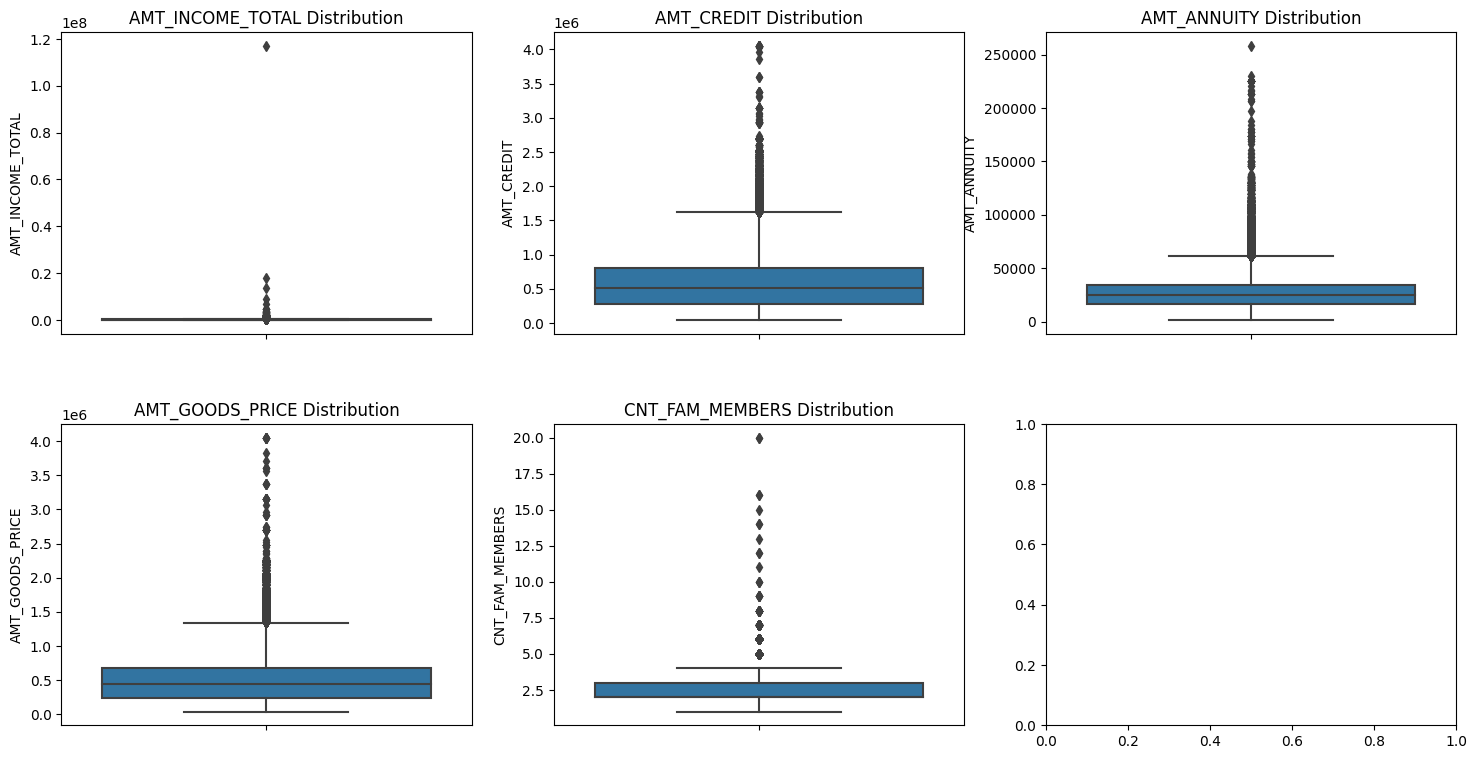

In [115]:
# Data Train BOX PLOT
box_plot, axs = plt.subplots(ncols = 3, nrows=2, figsize=(18, 9))

sns.boxplot(y = datamodel['AMT_INCOME_TOTAL'], ax = axs[0,0])
axs[0,0].set_title('AMT_INCOME_TOTAL Distribution')
sns.boxplot(y = datamodel['AMT_CREDIT'], ax = axs[0,1])
axs[0,1].set_title('AMT_CREDIT Distribution')
sns.boxplot(y = datamodel['AMT_ANNUITY'], ax = axs[0,2])
axs[0,2].set_title('AMT_ANNUITY Distribution')
sns.boxplot(y = datamodel['AMT_GOODS_PRICE'], ax = axs[1,0])
axs[1,0].set_title('AMT_GOODS_PRICE Distribution')
sns.boxplot(y = datamodel['CNT_FAM_MEMBERS'], ax = axs[1,1])
axs[1,1].set_title('CNT_FAM_MEMBERS Distribution')

box_plot.subplots_adjust(hspace=0.3)

Terdapat banyak data yang berada di luar loer dan upper bound tiap featurenya. Kemudian data tersebut akan dihapus dar data train.

In [116]:
# Dilakukan merge feature dan target dari data train terlebih dahulu sebelum dihapus outlier
merge_train = pd.concat([X_train,y_train], axis = 1)
merge_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215051 entries, 151965 to 306003
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   NAME_CONTRACT_TYPE  215051 non-null  int64  
 1   CODE_GENDER         215051 non-null  int64  
 2   FLAG_OWN_CAR        215051 non-null  int64  
 3   FLAG_OWN_REALTY     215051 non-null  int64  
 4   CNT_CHILDREN        215051 non-null  int64  
 5   AMT_INCOME_TOTAL    215051 non-null  float64
 6   AMT_CREDIT          215051 non-null  float64
 7   AMT_ANNUITY         215051 non-null  float64
 8   AMT_GOODS_PRICE     215051 non-null  float64
 9   NAME_INCOME_TYPE    215051 non-null  int64  
 10  NAME_FAMILY_STATUS  215051 non-null  int64  
 11  CNT_FAM_MEMBERS     215051 non-null  float64
 12  TARGET              215051 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 23.0 MB


In [117]:
# Outliers handling
print(f'Jumlah baris sebelum memfilter outlier : {len(X_train)}')
nums = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS']
for i in nums:
    q1 = merge_train[i].quantile(0.25)
    q3 = merge_train[i].quantile(0.75)
    iqr = q3 - q1
    low_limit = q1 - (1.5 * iqr)
    high_limit = q3 + (1.5 * iqr)
    filtered_entries = ((merge_train[i] >= low_limit) & (merge_train[i] <= high_limit))
    
merge_train = merge_train[filtered_entries] #filter untuk hanya mengambil value z-score < 3

print(f'Jumlah baris setelah memfilter outlier : {len(merge_train)}')

Jumlah baris sebelum memfilter outlier : 215051
Jumlah baris setelah memfilter outlier : 212287


In [118]:
# memisahkan dataset train kembali
X_train = merge_train.drop('TARGET',axis = 1)
y_train = merge_train['TARGET']

Kemudian akan dilakukan feature transformation yaitu dilakukan standarisasi untuk kolom numerik

In [119]:
# Feature Transformation
ss = StandardScaler()

for i in nums:
    scaler = ss.fit(X_train[[i]])
    X_train[i] = scaler.transform(X_train[[i]])
    scaler2 = ss.fit(X_test[[i]])
    X_test[i] = scaler2.transform(X_test[[i]])

In [120]:
#Checking the length of data train and data test
print('Data train shape:', X_train.shape)
print('Target train shape:', y_train.shape)
print('Data test shape:', X_test.shape)
print('Target test shape:', y_test.shape)

Data train shape: (212287, 12)
Target train shape: (212287,)
Data test shape: (92166, 12)
Target test shape: (92166,)


Akan dilakukan checking apakah terdapat imbalance class pada data train

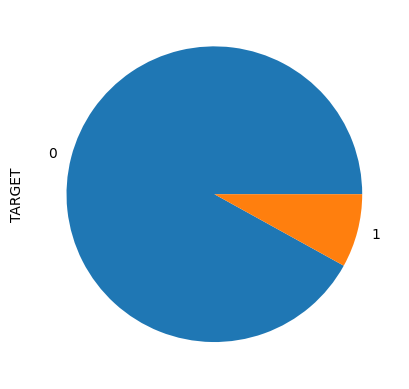

In [121]:
#Data Train's TARGET distribution
y_train.value_counts().plot(kind='pie')
plt.show()

Ternyata terdapat kasus imbalance class pada data train dengan rasio 1 dan 0 yang sangat ekstrim, sehingga akan dilakukan handling dengan metode SMOTE.

In [122]:
#Data preparation
#Class Imbalance handling with SMOTE method
from imblearn.over_sampling import SMOTE
from collections import Counter

# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE= SMOTE()

# fit and apply the transform 
X_train, y_train= SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train))

Before oversampling:  Counter({0: 195230, 1: 17057})
After oversampling:  Counter({0: 195230, 1: 195230})


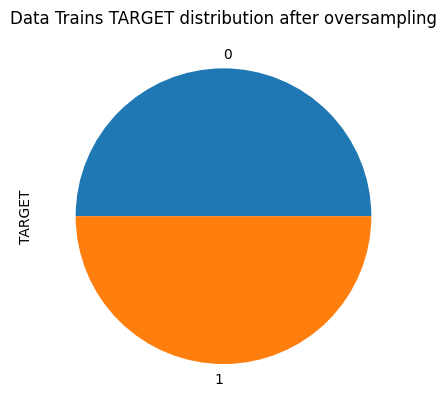

In [123]:
#Data Train's TARGET distribution after oversampling
import matplotlib.pyplot as plt
import pandas as pd

y_train.value_counts().plot(kind='pie')
plt.title('Data Trains TARGET distribution after oversampling')
plt.show()

#### Data Modeling

In [124]:
#Data modeling
#Classification with Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('model score:', lr.score(X_train, y_train))

model score: 0.589599446806331


In [125]:
#Logistic regression model testing
predict_lr = lr.predict(X_test)

# Print results: 
from sklearn.metrics import classification_report, confusion_matrix

print("confusion matrix:\n",confusion_matrix(y_test, predict_lr))
print("\nModel report:\n",classification_report(y_test, predict_lr))

confusion matrix:
 [[59740 24952]
 [ 4326  3148]]

Model report:
               precision    recall  f1-score   support

           0       0.93      0.71      0.80     84692
           1       0.11      0.42      0.18      7474

    accuracy                           0.68     92166
   macro avg       0.52      0.56      0.49     92166
weighted avg       0.87      0.68      0.75     92166



In [127]:
#Data modeling
#Classification with Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)
print('model score:', dt.score(X_train, y_train))

model score: 0.9885826973313527


In [128]:
#Decision Tree model testing
predict_dt = dt.predict(X_test)

# Print results: 
from sklearn.metrics import classification_report, confusion_matrix

print("confusion matrix:\n",confusion_matrix(y_test, predict_dt))
print("\nModel report:\n",classification_report(y_test, predict_dt))

confusion matrix:
 [[23432 61260]
 [ 1929  5545]]

Model report:
               precision    recall  f1-score   support

           0       0.92      0.28      0.43     84692
           1       0.08      0.74      0.15      7474

    accuracy                           0.31     92166
   macro avg       0.50      0.51      0.29     92166
weighted avg       0.86      0.31      0.40     92166



In [129]:
#Data modeling
#Classification with Decision Tree
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)

xg.fit(X_train, y_train)
print('model score:', xg.score(X_train, y_train))

model score: 0.9000614659632229


In [130]:
#XGBoost model testing
predict_xg = xg.predict(X_test)

# Print results: 
from sklearn.metrics import classification_report, confusion_matrix

print("confusion matrix:\n",confusion_matrix(y_test, predict_xg))
print("\nModel report:\n",classification_report(y_test, predict_xg))

confusion matrix:
 [[15575 69117]
 [ 1091  6383]]

Model report:
               precision    recall  f1-score   support

           0       0.93      0.18      0.31     84692
           1       0.08      0.85      0.15      7474

    accuracy                           0.24     92166
   macro avg       0.51      0.52      0.23     92166
weighted avg       0.87      0.24      0.29     92166



In [131]:
#Data modeling
#Classification with Decision Tree
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)
print('model score:', rf.score(X_train, y_train))

model score: 0.9885801362495518


In [132]:
# Random Forest model testing
predict_rf = rf.predict(X_test)

# Print results: 
from sklearn.metrics import classification_report, confusion_matrix

print("confusion matrix:\n",confusion_matrix(y_test, predict_rf))
print("\nModel report:\n",classification_report(y_test, predict_rf))

confusion matrix:
 [[51728 32964]
 [ 3931  3543]]

Model report:
               precision    recall  f1-score   support

           0       0.93      0.61      0.74     84692
           1       0.10      0.47      0.16      7474

    accuracy                           0.60     92166
   macro avg       0.51      0.54      0.45     92166
weighted avg       0.86      0.60      0.69     92166

